In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (200, 5)

Missing Values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Duplicates: 0

Data Types:
 CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object


In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [7]:
# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = df.copy()
numeric_columns = ['Annual_Income_(k$)', 'Spending_Score']
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

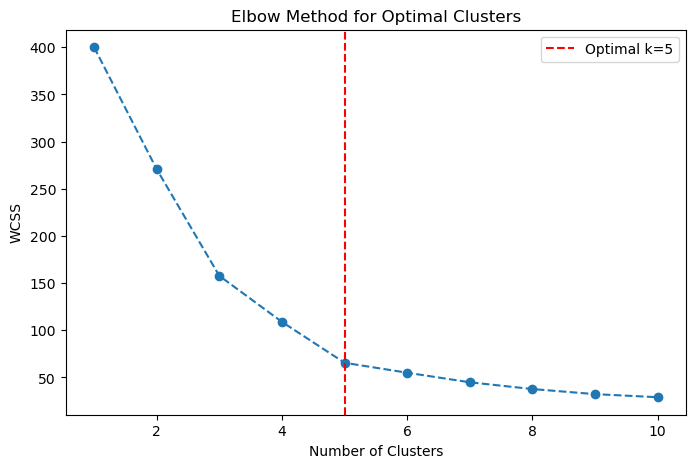

In [19]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[numeric_columns])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.savefig('elbow_method.png')  # Save the plot
plt.show()


In [20]:
# Silhouette Score for validation
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled[numeric_columns])
    silhouette_scores[k] = silhouette_score(df_scaled[numeric_columns], cluster_labels)

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print("Optimal number of clusters based on Silhouette Score:", optimal_k)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Optimal number of clusters based on Silhouette Score: 5


In [21]:
# Apply K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[numeric_columns])

df['Cluster'] = df_scaled['Cluster']  # Adding the cluster labels 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
print("Cluster Labels Distribution:\n", df_scaled['Cluster'].value_counts())
print("\nFirst 10 Assigned Clusters:\n", df_scaled[['Annual_Income_(k$)', 'Spending_Score', 'Cluster']].head(10))

Cluster Labels Distribution:
 Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64

First 10 Assigned Clusters:
    Annual_Income_(k$)  Spending_Score  Cluster
0           -1.738999       -0.434801        2
1           -1.738999        1.195704        3
2           -1.700830       -1.715913        2
3           -1.700830        1.040418        3
4           -1.662660       -0.395980        2
5           -1.662660        1.001596        3
6           -1.624491       -1.715913        2
7           -1.624491        1.700384        3
8           -1.586321       -1.832378        2
9           -1.586321        0.846310        3


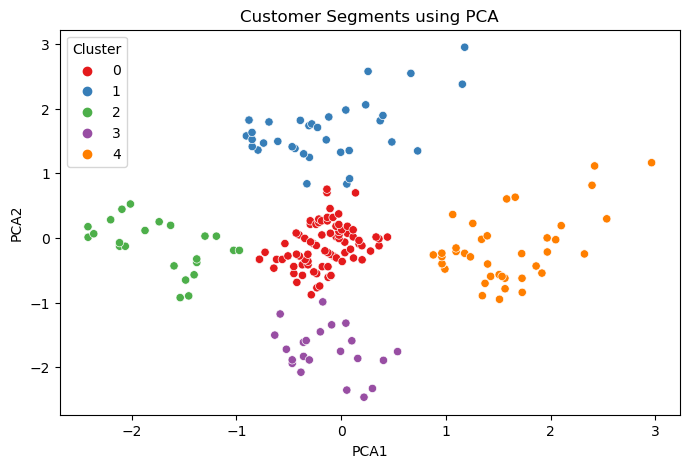

In [24]:
# 2D Scatter Plot using PCA
pca = PCA(n_components=2)
df_scaled[['PCA1', 'PCA2']] = pca.fit_transform(df_scaled[numeric_columns])
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue=df_scaled['Cluster'], palette='Set1', data=df_scaled)
plt.title('Customer Segments using PCA')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


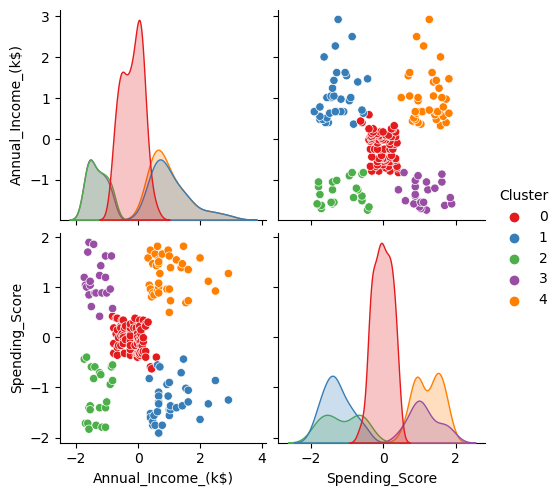

In [18]:
# Pair Plot
sns.pairplot(df_scaled, hue='Cluster', vars=numeric_columns, palette='Set1')
plt.show()

## Recommendations--
     1. High-spending clusters should be targeted with loyalty programs and premium product offers
     2. Low-income, high-spending customers could benefit from budget-friendly promotions.
     3. Different age groups should receive targeted marketing campaigns based on their spending patterns.
